In [83]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
# read the data 

bikeSharing = pd.read_csv(r"D:\Mritu\Study\Upgrad\Assignments\BikeSharingAssignment\day.csv")
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [54]:
# drop columns casual and registered. cnt is casual + registered

bikeSharing = bikeSharing.drop(["casual", "registered"], axis = 1)
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


###### Data Preparation

In [55]:
# get the shape of table
bikeSharing.shape

(730, 14)

In [49]:
# to check for any missing value
bikeSharing.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

In [56]:
# statistical values
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [75]:
# map categorical data from data dictionay
integer_to_category = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4:"Heavy Rain"}
bikeSharing["weathersit1"] = bikeSharing["weathersit"].map(integer_to_category)

integer_to_category = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
bikeSharing["season1"] = bikeSharing["season"].map(integer_to_category)


# drop unwanted column
bikeSharing = bikeSharing.drop(["weathersit", "season", "dteday"], axis = 1)

bikeSharing.head(2)

KeyError: 'weathersit'

In [91]:
# Convert date column to datetime type
bikeSharing = bikeSharing.drop(["dteday"], axis = 1)


###### Dummy variables

In [67]:
# dummy variable for season and weathersit
weather_status = pd.get_dummies(bikeSharing['weathersit1'])
weather_status.head()

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [68]:
season_status = pd.get_dummies(bikeSharing['season1'])
season_status.head()


,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [69]:
# concat dummies to orignial data frame
bikeSharing = pd.concat([bikeSharing, weather_status], axis=1)
bikeSharing = pd.concat([bikeSharing, season_status], axis=1)


,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,cnt,weathersit1,season1,Clear,Light Snow,Mist,fall,spring,summer,winter
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,...,985,Mist,spring,0,0,1,0,1,0,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,...,801,Mist,spring,0,0,1,0,1,0,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,...,1349,Clear,spring,1,0,0,0,1,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,...,1562,Clear,spring,1,0,0,0,1,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,...,1600,Clear,spring,1,0,0,0,1,0,0


In [72]:
# drop unused column now
bikeSharing = bikeSharing.drop(["weathersit1", "season1"], axis=1)

In [74]:
bikeSharing.head(2)

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Clear,Light Snow,Mist,fall,spring,summer,winter
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0


In [79]:
bikeSharing.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Clear,Light Snow,Mist,fall,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.634247,0.028767,0.336986,0.257534,0.246575,0.252055,0.243836
std,210.877136,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.481971,0.167266,0.473004,0.437576,0.431313,0.434490,0.429689
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


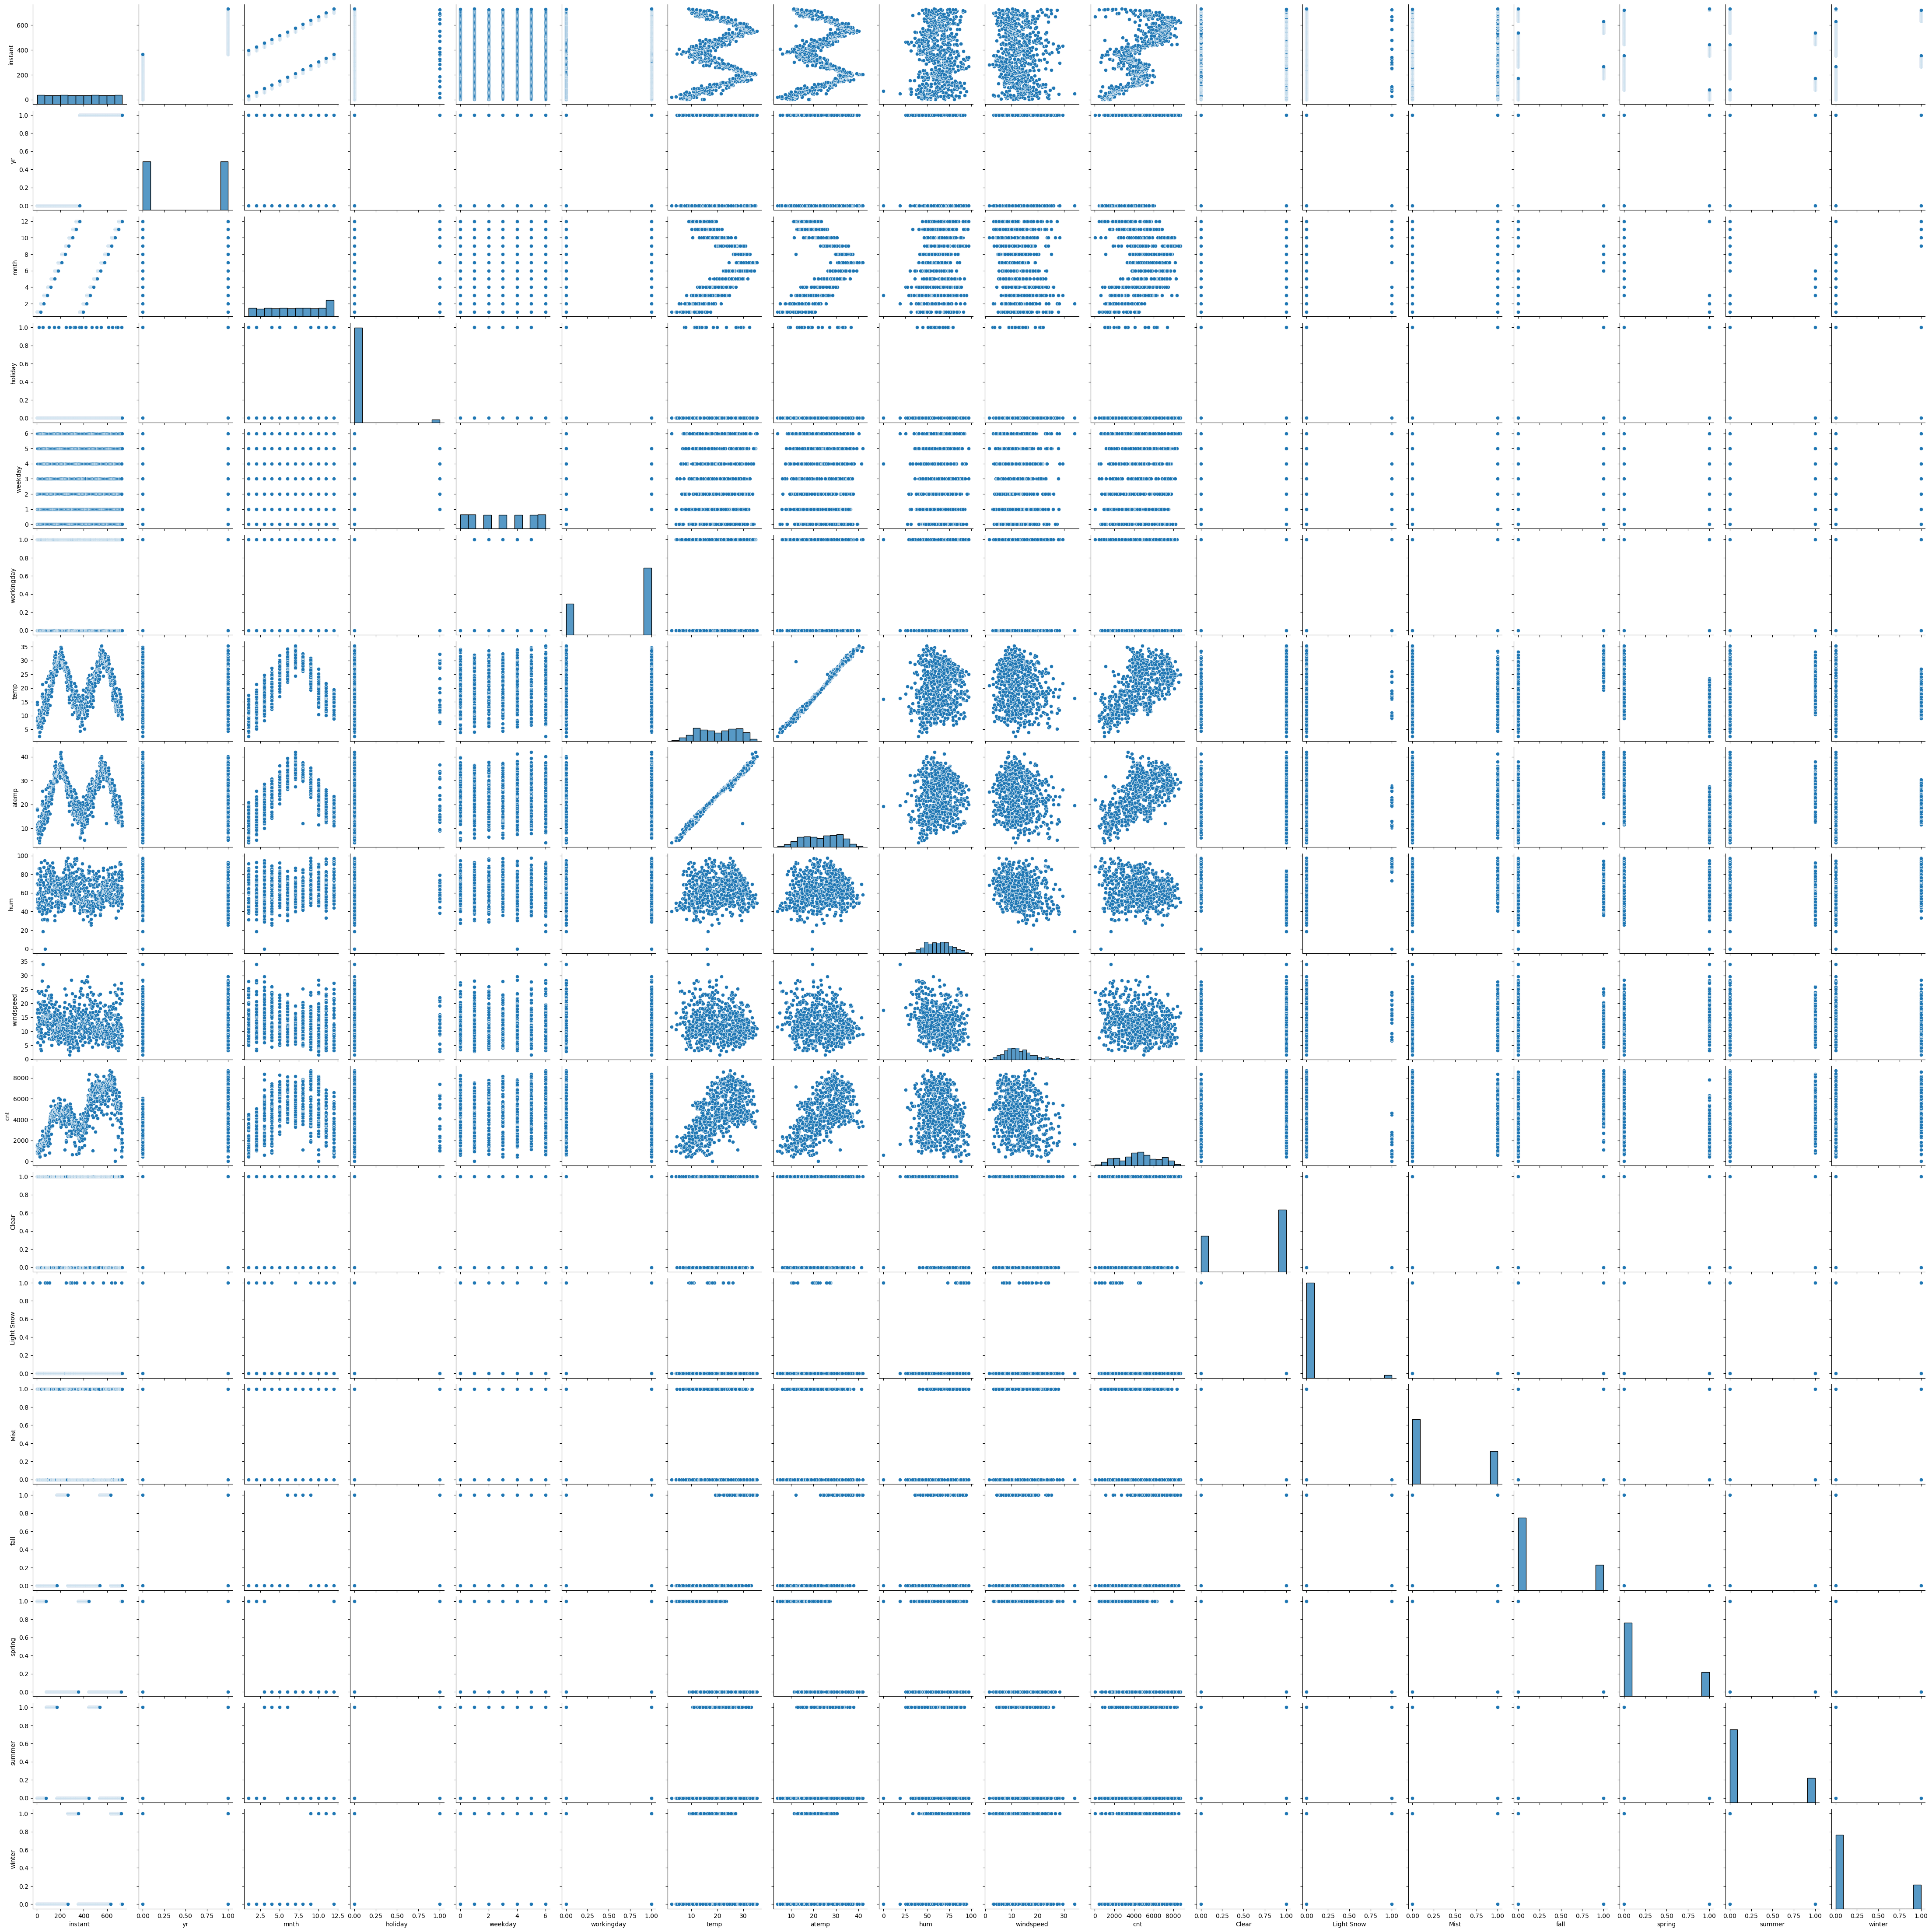

In [78]:
# in order to read it properly, we need to convert some int column into catergotical values
# check if linear regression make sence
# visualizing the numerical variables
#varlist =  ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit','temp','windspeed','cnt']
#bikeSharing.columns
#bikeSharing[varlist]
sns.pairplot(bikeSharing)
plt.show()

###### Splitting the Data into Training and Testing Sets

In [93]:
# creating train data
df_train, df_test = train_test_split(bikeSharing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 18)
(220, 18)


######  Rescaling the Features

In [94]:
# rescaling the features 

# we will use min max scaling
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

scaler = MinMaxScaler()

#2. fit to data
num_vars = ['temp', 'atemp', 'cnt', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Clear,Light Snow,Mist,fall,spring,summer,winter
576,577,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,1,0,0,0
426,427,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,1,0,1,0,0
728,729,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0
482,483,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,0,0,1,0
111,112,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,1,0,0,1,0


######  Dividing into X and Y sets for the model building

In [100]:
y_train = df_train.pop('cnt')
X_train = df_train

###### Building our model

In [103]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select = 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [104]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 8),
 ('yr', True, 1),
 ('mnth', False, 7),
 ('holiday', True, 1),
 ('weekday', False, 6),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('fall', False, 5),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [105]:
# column required..  low ranking
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Clear', 'Light Snow',
       'Mist', 'spring', 'winter'],
      dtype='object')

In [106]:
# columns not required.. high ranking
X_train.columns[~rfe.support_]

Index(['instant', 'mnth', 'weekday', 'workingday', 'atemp', 'fall', 'summer'], dtype='object')

###### Building model using statsmodel, for the detailed statistics

In [108]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [110]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [111]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [112]:
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.75e-182
Time:                        19:23:45   Log-Likelihood:                 481.12
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     500   BIC:                            -899.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1803      0.028      6.484      0.0

In [113]:
# based on standard error, lets remove hum  and rebuild model
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [114]:
# Rebuilding the model without hum
X_train_lm = sm.add_constant(X_train_new)

In [115]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [116]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     284.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          6.44e-181
Time:                        19:32:46   Log-Likelihood:                 475.72
No. Observations:                 510   AIC:                            -933.4
Df Residuals:                     501   BIC:                            -895.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1133      0.019      5.966      0.0

In [117]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Clear', 'Light Snow',
       'Mist', 'spring', 'winter'],
      dtype='object')

In [118]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [119]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Clear,20.73
6,Mist,11.03
7,spring,2.51
2,temp,2.46
5,Light Snow,1.99
8,winter,1.71
3,windspeed,1.07
0,yr,1.02
1,holiday,1.01


######  Residual Analysis of the train data

In [120]:
# check if the error terms are also normally distributed 
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

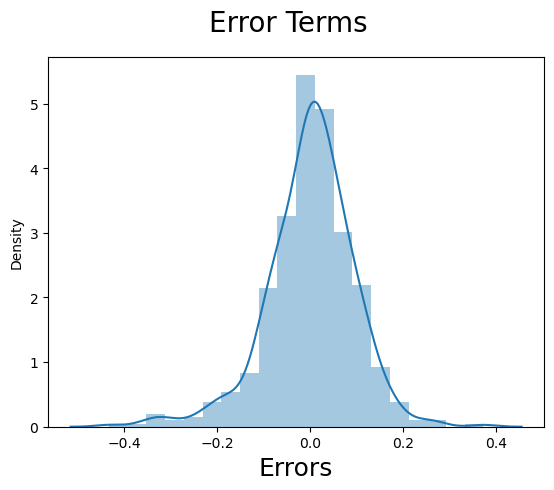

In [121]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

######  Making Predictions

In [123]:
# Applying the scaling on the test sets


In [124]:
num_vars = ['temp', 'atemp', 'cnt', 'hum', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

###### Dividing into X_test and y_test

In [125]:
y_test = df_test.pop('cnt')
X_test = df_test

In [126]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [127]:
# Making predictions
y_pred = lm.predict(X_test_new)

###### Model Evaluation

Text(0, 0.5, 'y_pred')

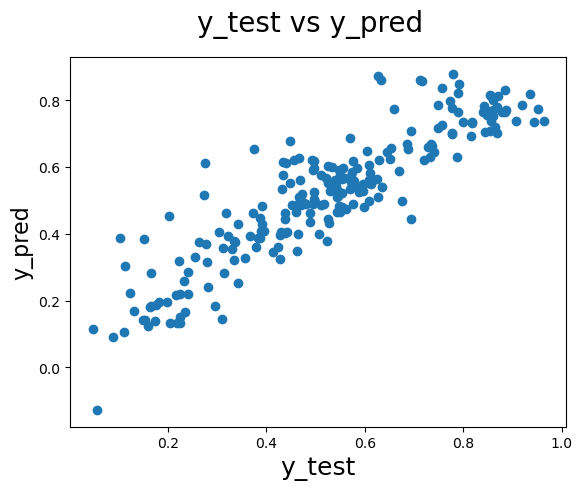

In [128]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-lab

In [129]:
# create r2 
r2_score(y_test, y_pred)

0.8018826530251254